In [13]:
from pathlib import Path
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.cluster import KMeans
import json
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
of_aligneddir = Path('/home/jphacks/LipNet-JP/data/processed/cLgEcNPr-ZE_aligned/')
aligned_lm_path = Path('/home/jphacks/LipNet-JP/data/processed2/cLgEcNPr-ZE_aligned.csv')
cropped_outdir = Path('/home/jphacks/LipNet-JP/data/processed2/cLgEcNPr-ZE_aligned_aligned_cropped/')
cropped_outdir.mkdir(exist_ok=True)

workdir = Path('/home/jphacks/LipNet-JP/')
# youtube_id = '1'
youtube_id = '2'
spk = 's{}'.format(youtube_id)
txtpath = workdir / 'data/align' / 'output1.align'
aligned_lm_path = Path('/home/jphacks/LipNet-JP/data/processed2/{0}/{0}_aligned.csv'.format(youtube_id))
lm_path = Path('/home/jphacks/LipNet-JP/data/processed/{0}/{0}.csv'.format(youtube_id))
croppeddir = Path('/home/jphacks/LipNet-JP/data/processed2/{0}/{0}_aligned_aligned_cropped'.format(youtube_id))
assert croppeddir.exists()

datadir = Path('/home/jphacks/LipNet-JP/data')
videodir = datadir / 'lip_video'
txtdir = datadir / 'align_txt'

In [6]:
lm_df = pd.read_csv(aligned_lm_path)
lm_df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.0,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0.0,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0.0,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49109,49110,0,0.0,0.88,1,0.212486,0.138366,-0.967318,-0.172978,0.166698,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
49110,49111,0,0.0,0.88,1,0.208562,0.149444,-0.966524,-0.193307,0.144304,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
49111,49112,0,0.0,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49112,49113,0,0.0,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
lip_idexies = list(range(48, 68))

lip_x_list = [' x_{}'.format(i) for i in lip_idexies]
lip_y_list = [' y_{}'.format(i) for i in lip_idexies]

lm_df[' x_lip_mean'] = lm_df[lip_x_list].mean(axis=1)
lm_df[' y_lip_mean'] = lm_df[lip_y_list].mean(axis=1)

lip_x_norm_list = [' x_norm_{}'.format(i) for i in lip_idexies]
lip_y_norm_list = [' y_norm_{}'.format(i) for i in lip_idexies]


In [9]:
X = lm_df[lip_x_list + lip_y_list].values

In [10]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

# >>> from sklearn.cluster import KMeans
# >>> import numpy as np
# >>> X = np.array([[1, 2], [1, 4], [1, 0],
# ...               [10, 2], [10, 4], [10, 0]])
# >>> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# >>> kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# >>> kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
# >>> kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])

In [ ]:
model = torch.nn.Conv2d()


In [ ]:
kmeans.labels_

In [ ]:
pd.Series(kmeans.labels_).value_counts()

In [12]:
kmeans.cluster_centers_

array([[ 67.54018619,  75.73762607,  86.10178433,  93.69899147,
        102.25709853, 116.58541505, 130.86726144, 117.84181536,
        104.578045  ,  95.08487199,  86.62761831,  76.34592708,
         72.63498836,  86.73553142,  94.46648565, 103.17672614,
        124.69340574, 103.69728472,  94.75686579,  86.87928627,
        140.48782002, 134.44553918, 131.57595035, 134.16966641,
        132.43452289, 136.09402638, 142.15849496, 154.89953452,
        160.36004655, 161.14026377, 159.83638479, 153.9901474 ,
        141.18999224, 140.14561676, 141.17564003, 140.66811482,
        142.8121024 , 147.47028704, 148.17253685, 146.79387122],
       [ 67.85952849,  79.79479371,  91.80923379, 100.18664047,
        109.04204322, 121.19734774, 131.85088409, 121.5240668 ,
        110.00628684, 100.38555992,  91.29007859,  79.39066798,
         73.46011788,  91.81267191, 100.25530452, 109.27318271,
        126.22711198, 109.41669941, 100.30992141,  91.68280943,
        142.68870334, 136.69744597, 133

In [11]:
with open(txtpath, 'r') as f:
    txt = json.load(f)
    
aligned_lm_df = pd.read_csv(str(aligned_lm_path))
aligned_lm_df[' timestamp'] = (aligned_lm_df['frame'] - 1) * (1/30)
    

train_rate = 0.8
all_len = len(txt)
train_f = open(str(datadir / 'jp_train.txt'), 'w')
val_f = open(str(datadir / 'jp_val.txt'), 'w')
for idx, word in tqdm(enumerate(txt)):
    start0 = 10000000
    end0 = 0
    for w in word:
        start = w['start']
        end = w['end']
        start0 = min(start0, start)
        end0 = max(end0, end)

    video = aligned_lm_df[(aligned_lm_df[' timestamp'] > start0) & (aligned_lm_df[' timestamp'] < end0)]
    # TODO: exclude rotated faces
#     print(video.frame.values)
#     print(word)
    
    frames_dir = videodir / spk / 'video/mpg_6000' / '{:06d}'.format(idx)
    frames_dir.mkdir(parents=True, exist_ok=True)
#     print(videodir / spk / 'video/mpg_6000' / '{:06d}'.format(idx))
#     print(txtdir / spk / 'align' / '{:06d}.align'.format(idx))
    
    # Copy video frames
    for frame in video.frame.values:
        frame_path = croppeddir / 'frame_det_00_{:06d}.bmp'.format(frame)
        assert frame_path.exists()
        
    print(kmeans.predict(video[lip_x_list + lip_y_list].values))
    print([w['word'] for w in word])
    
    if idx > 10:
        break

3it [00:00,  4.49it/s]

[1 1 1 1 1 1 1 1 1]
['na', 'an', 'na']
[1 1 1 1 1 1 1 1 1 1 1 1 1]
['ne']
[1 1 1 1 1 1]
['ou']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['aa', 'ao']
[1 1 1 1 1 1 1 1]
['ou', 'ui', 'iu']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['eu']
[1 1 1 1 1 1]
['ne']


8it [00:00, 13.13it/s]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['na', 'aa']
[1 1 1 1 1 1 1 1 1 1 1]
['aa', 'ai']
[1 1 1 1 1 1 1 1 1 1 1]
['na']
[1 1 1 1 1 1 1 1 1 1]
['an', 'ni']
[1 1 1 1 1 1 1]
['on', 'na', 'ai']


In [15]:
import torch
import torchvision
import torchvision.transforms as transforms



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

170500096it [00:02, 83276572.03it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


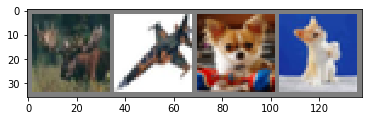

 deer plane   dog   cat


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [31]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


KeyboardInterrupt: 

In [21]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

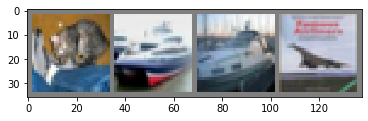

GroundTruth:    cat  ship  ship plane


In [22]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [29]:
images.shape

torch.Size([4, 3, 32, 32])

In [23]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [24]:
outputs = net(images)

In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 68 %
Accuracy of  bird : 47 %
Accuracy of   cat : 28 %
Accuracy of  deer : 39 %
Accuracy of   dog : 56 %
Accuracy of  frog : 62 %
Accuracy of horse : 67 %
Accuracy of  ship : 74 %
Accuracy of truck : 55 %
